In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects
# %matplotlib inline

# Helper Functions

In [4]:
#Figure Formatting parameters

def fig_formate(fig_x=10.0,fig_y=7.0):
    sns.set(style='whitegrid') # 'white'
    fig, ax = plt.subplots(figsize=(fig_x,fig_y))
    SMALL_SIZE = 15
    MEDIUM_SIZE = 15
    BIGGER_SIZE = 25
    CUSTOM_SIZE = 20
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=CUSTOM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    return (fig,ax)

In [5]:
#adds median labels to boxplots
def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',
                        color='white')#fontweight='bold',
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

In [91]:
# decorate and plot a boxplot 


## Customize data Frame Reading
This function takes three arguments and returns a data frame:
1. data frame
2. beltTension: List or an int (query parameter)
3. loadAlais: list or int (query parameter)

This function returns a customized data frame based on respective query parameters

In [3]:
def customize_DF_reading(df, beltTension, loadAlias):
    data_frame=pd.DataFrame()
    median=[]
    if (isinstance(beltTension,list) and isinstance(loadAlias,list)):
            for tension in beltTension:
                for load in loadAlias:
                    temp=df.loc[(df['%Belt Tension']==tension) &(df['Load Combinations']==load)]
                    median.append(round(temp['Power (W)'].median(),1))
                    data_frame=pd.concat([data_frame,temp])

    return (data_frame,median)

# Some Note about CNV data collection:

1. Main coneyor has 4 zones labled as Z1,Z2,Z3,Z5. This CNV can process up to 4 pallets.
2. These zones generates 16 different combinations for pallet(load) processing on main conveyor. Load is varied on CNV according to these combinations
   which helps us to capture the minute effct on power consumed by conveyor motor driver.
3. These Combinations are listed below:

| Combination Number | Combination | Description|
|:--------------------|:-------------|:------------|
|0 | 0000 | No Load
|1 | 1000 | 1 Pallet at Z1
|2 | 0100 | 1 Pallet at Z2
|3 | 1100 | 2 pallets; Z1 and Z2 respectively
|4 | 0010 | 1 Pallet at Z3
|5 | 1010 | 2 pallets; Z1 and Z3 respectively
|6 | 0110 | 2 pallets; Z3 and Z3 respectively
|7 | 1110 | 3 pallets; Z1, Z2 and Z3 respectively
|8 | 0001 | 1 Pallet at Z5
|9 | 1001 | 2 pallets; Z1 and Z5 respectively
|10 | 0101 | 2 pallets; Z2 and Z5 respectively
|11| 1101 | 3 pallets; Z1, Z2 and Z5 respectively
|12| 0011 | 2 pallets; Z3 and Z5 respectively
|13| 1011 | 3 pallets; Z1, Z3 and Z5 respectively
|14| 0111 | 3 pallets; Z2, Z3 and Z5 respectively
|15| 1111 | 4 pallets; Z1, Z2, Z3 and Z5 respectively(Full Load)
    

# Observations for belt tension ranging between 0% to 60%
Here belt tension gradually incresed from 0% to 60%.
Observations:
1. This belt tension range is not suitable for any operation with these belt tension values, there is 
    too much slip in the belt hence there is no motion in the belt.
2. In the box plot of data each box shows the recorded value of power consumed by conveyor driver motor
   for each 15% increment in belt tension respectively.
3. this data is collected for no load condition (Combination 0: 0000)
4. Each box on the plot is plotted for hundred data samples. Each sample is the avarage of five data samples. The samples
   are collected with a sampling interval of 300ms.
5. For belt tension, 0 to 15 percent most of the data is centered about 230W.
6. For belt tension, 45 to 60 percent mostly power consumption data is centred about 233W. There is a 3 point increase in power consumption as comapred to previous belt tensions. 

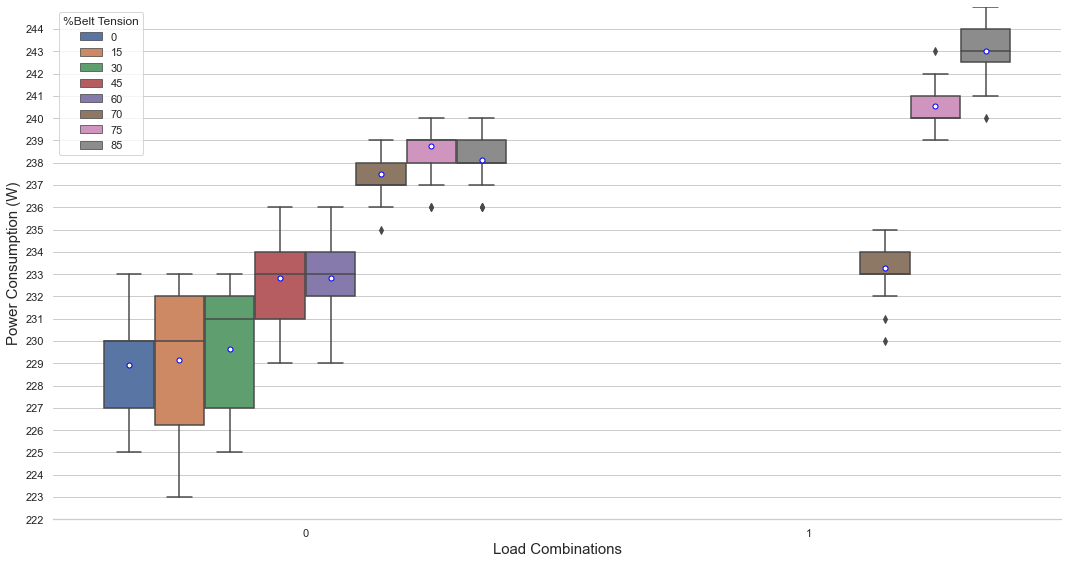

In [27]:
def plot_data(df_concat,fig_name='aa',title='aa'):#x_limit,y_limit

    fig, ax = plt.subplots(figsize=(15,8))#10,7 13,8,15,8
    #plt.xlim([1,5])
    #plt.xticks(np.arange(0,60,15))
    plt.ylim([222,245])
    plt.yticks(np.arange(222,245,1))
    # remove all borders except bottom
    sns.despine(top=True,
                right=True,
                left=True,
                bottom=False)
    # my_palette= {0:'#B7C3D0',1:'#B7C3D0',2:'#B7C3D0',
    #              3:'#FF6A6A',4:'#B7C3D0',5:'#B7C3D0',
    #           6:'#FF6A6A',7:'#FF6A6A',8:'#B7C3D0',
    #           9:'#B7C3D0',10:'#FF6A6A',11:'#B7C3D0',12:'#FF6A6A',
    #           13:'#B7C3D0',14:'#FF6A6A',15:'#FF6A6A'}
    # my_palette= {0:'#B7C3D0',15:'#B7C3D0',30:'#B7C3D0',
    #             45:'#B7C3D0',60:'#B7C3D0',70:'y',
    #         75:'g',85:'g',95:'#FF6A6A'}

    my_palette=sns.color_palette("deep")
    box_plot=sns.boxplot(y=df_concat['Power (W)'], x=df_concat['Load Combinations'],
    #df_concat['Load Combinations'],df_concat['%Belt Tension']
                data=df_concat, orient='v',width=0.8,#0.7
                palette=my_palette,
                hue=df_concat['%Belt Tension'], #df_concat['%Belt Tension'],df_concat['Load Combinations']
                showmeans=True,
                meanprops={"marker":"o","markerfacecolor":"white",
                "markeredgecolor":"blue","markersize":"5"}) 


    plt.xlabel("Load Combinations", fontsize=15)#Load Combinations %Belt Tension
    plt.ylabel("Power Consumption (W)",fontsize=15)
    # leg=['0:0000','1:1000','2:0100','4:0010','8:0001']
    #box_plot.set_title(f"Power Consumption of Main CNV with 0% to 60% Belt Tension\n for Load Combinations[0].", 
                        # fontsize=15)

    #plt.legend(bbox_to_anchor=(1.2, 1),loc='upper right',title='%Belt Tension')
    # plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
    #ax.legend(leg)
    #add_median_labels(box_plot.axes)
    plt.tight_layout()
    sns.set(style='whitegrid')
    plt.savefig('Fig14.png', dpi=500)
    plt.show()

 
df= pd.read_csv(r"C:\Users\elahi\Desktop\FASTORY_ECPR\s_measurements10.csv")
tension=[0,15,30,45,60,70,75,85] #0,15,30,45,60,70,75,85,95
#0,1,2,4,8 - 3,5,6,9,10,12 - 7,11,13,14,15
#0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
loadAlias=[0,1]
df_concat,median=customize_DF_reading(df, tension,loadAlias)
plot_data(df_concat)#_concat